# Import Data

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

### *What is the dataset, Library Collection Inventory?*
##### This dataset includes monthly snapshot of all of the physical items in the Seattle Public Library’s collection. Consistent monthly data begins with a snapshot taken August 1, 2016, continuing to the present. Additionally, this dataset contains snapshots taken on: January 1 in the years 2012, 2013, 2014, and 2016.

### *Dataset Columns*

###### Subjects : Subject authroity records associated with the title, including Motion Pictures, Computer Programming, etc... Typiclaly these are highly specific

###### Item type : 

###### Publisher

###### Reprot Date : The date when this item count was collected from the ILS (Horizon).

###### ItemCount : The number of items in this location, collection, item type, and item status as of the report date.
######

In [2]:
data = pd.read_csv("Checkouts_by_Title.csv", usecols = ['UsageClass', 'CheckoutType', 'MaterialType', 'CheckoutYear', 'CheckoutMonth','Checkouts', 'Title'], keep_default_na = True)
data.dataframeName = 'Checkouts_by_Title.csv'
nRows, nCol = data.shape
print(data.head(10))

  UsageClass CheckoutType MaterialType  CheckoutYear  CheckoutMonth  \
0    Digital    OverDrive        EBOOK          2016              6   
1    Digital      Freegal         SONG          2016              6   
2   Physical      Horizon         BOOK          2016              6   
3   Physical      Horizon         BOOK          2016              6   
4   Physical      Horizon         BOOK          2016              6   
5   Physical      Horizon         BOOK          2016              6   
6    Digital    OverDrive        EBOOK          2016              6   
7    Digital    OverDrive        EBOOK          2016              6   
8   Physical      Horizon         BOOK          2016              6   
9   Physical      Horizon         BOOK          2016              6   

   Checkouts                                              Title  
0          3  Sailor and Fiddler: Reflections of a 100-Year-...  
1          1                                      The Handshake  
2          1  The ba

In [3]:
potter = data[data['Title'].str.contains("Harry Potter and")]

In [4]:
np.unique(potter['Title'])[0:10]
# Dataset contains Harry Potter related contents

array(['Haeri Poto wa Ajukaban ui choesu Harry Potter and the prisoner of Azkaban',
       "Haeri Pʻotʻŏ wa mabŏpsa ŭi tol = Harry Potter and the philosopher's stone / Joaen K. Rolling chiŭm ; Kim Hye-wŏn omgim.",
       'Haeri Pʻotʻŏ wa pimil ŭi pang = Harry Potter and the chamber of secrets / Joaen K. Rolling chiŭm ; Kim Hye-wŏn omgim.',
       'Haeri Pʻotʻŏ wa pul ŭi chan = Harry Potter and the goblet of fire / Joaen K. Rolling chiŭm ; Kim Hye-wŏn, Chʻoe In-ja omgim.',
       'Hali Bote : huo bei de kao yan = [Harry Potter and the goblet of fire] / J.K. Luolin (J.K. Rowling), zhu ; Peng Qianwen, yi.',
       "Hali Bote yu mo fa shi = Harry Potter and the philosopher's stone / [Ying] J.K. Luolin, zhu ; Su Nong, yi.",
       'Hari Potta to Azukaban no shujin Harry Potter and the prisoner of Azkaban',
       'Hari Potta to fujicho no kishidan = Harry Potter and the Order of the Phoenix / J.K. Rowling cho ; Matsuoka Yūko yaku.',
       'Hari Potta to himitsu no heya Harry Potter and the

In [5]:
potter_checkouts_by_date = potter.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts').reset_index()
potter_checkouts_by_date['Date'] = pd.to_datetime(
    potter_checkouts_by_date['CheckoutYear']*100 + potter_checkouts_by_date['CheckoutMonth'], format="%Y%m"
)
# 10000 are here to easily convert 20214 to 202104 which can easily be read as april 2021
potter_checkouts_by_date.head()

,CheckoutYear,CheckoutMonth,Checkouts,Date
0,2005,4,269,2005-04-01
1,2005,5,474,2005-05-01
2,2005,6,601,2005-06-01
3,2005,7,730,2005-07-01
4,2005,8,667,2005-08-01


<AxesSubplot:xlabel='Checkout Date', ylabel='Harry Potter content checkouts'>

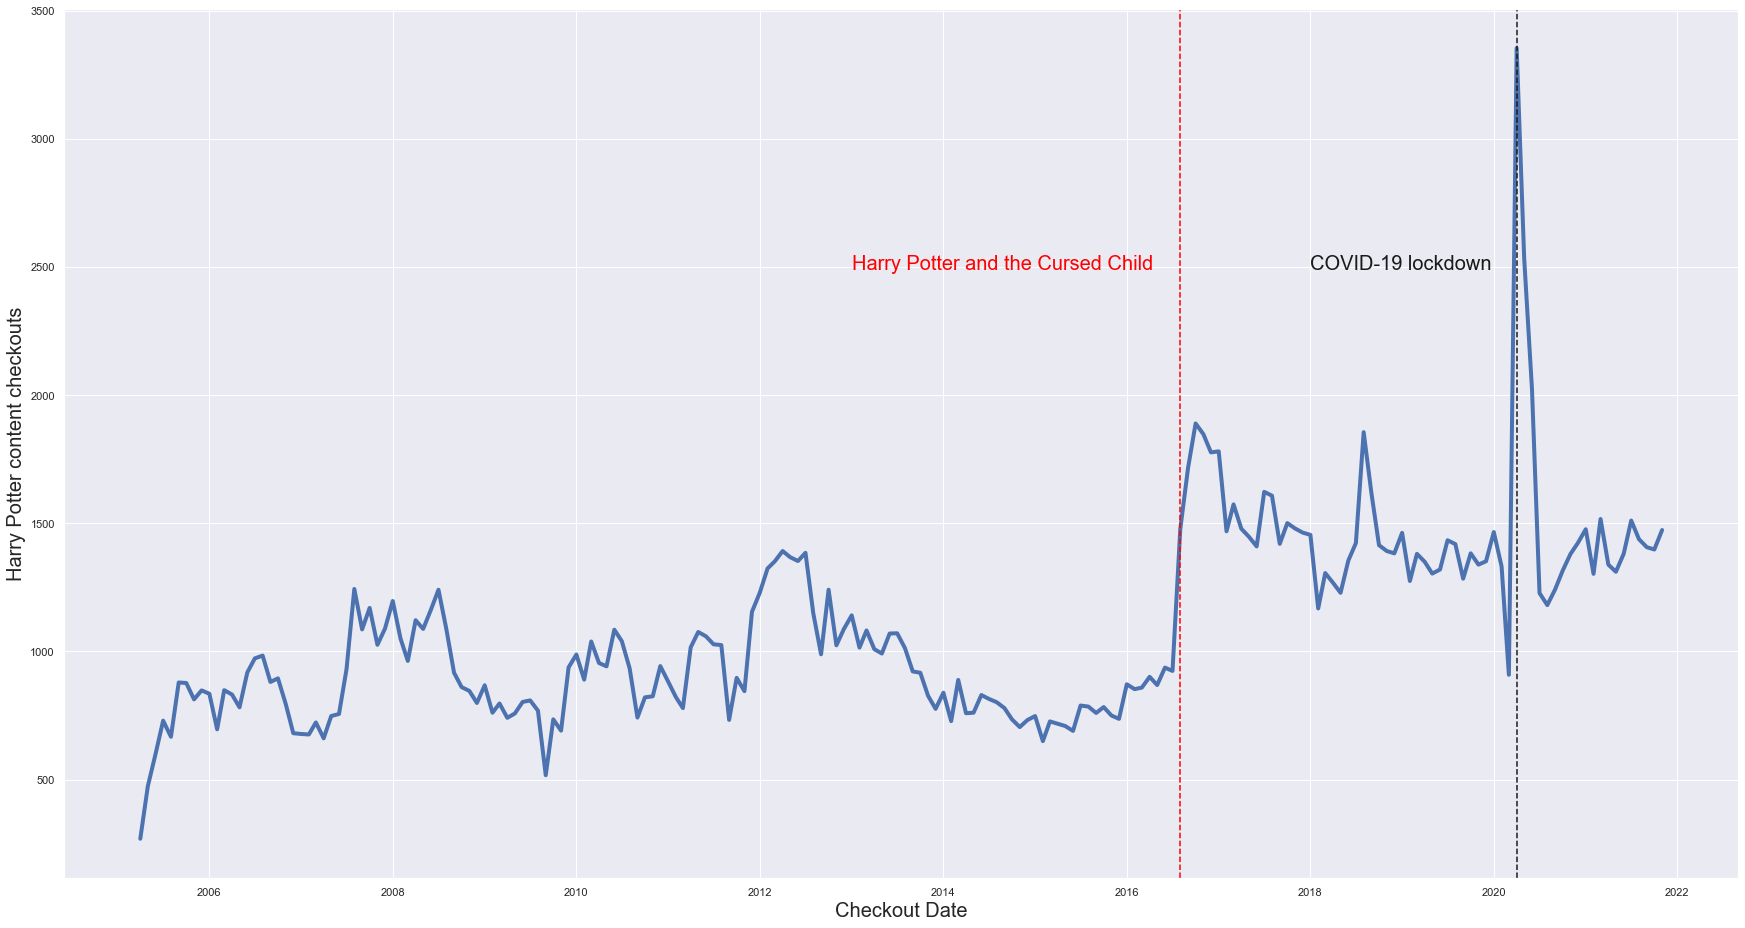

In [7]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = potter_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Harry Potter content checkouts", fontsize = 20)
p.axvline(datetime(2016, 7, 30), color="red", linestyle = "--")
p.axvline(datetime(2020, 4, 1), color="k", linestyle = "--")
p.text(datetime(2013, 1, 1), .7, 'Harry Potter and the Cursed Child', color="red", fontsize = 20, transform=trans)
p.text(datetime(2018, 1, 1), .7, 'COVID-19 lockdown', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
p

### Were people really reading more during first weeks of Covid lockdowns?

In [8]:
checkouts_by_month = data.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts')

In [9]:
checkouts_by_month = checkouts_by_month.reset_index()
checkouts_by_month['Date'] = pd.to_datetime(
    checkouts_by_month['CheckoutYear']*100 + checkouts_by_month['CheckoutMonth'], format="%Y%m"
)

<AxesSubplot:xlabel='Checkout Date', ylabel='Monthly Checkouts'>

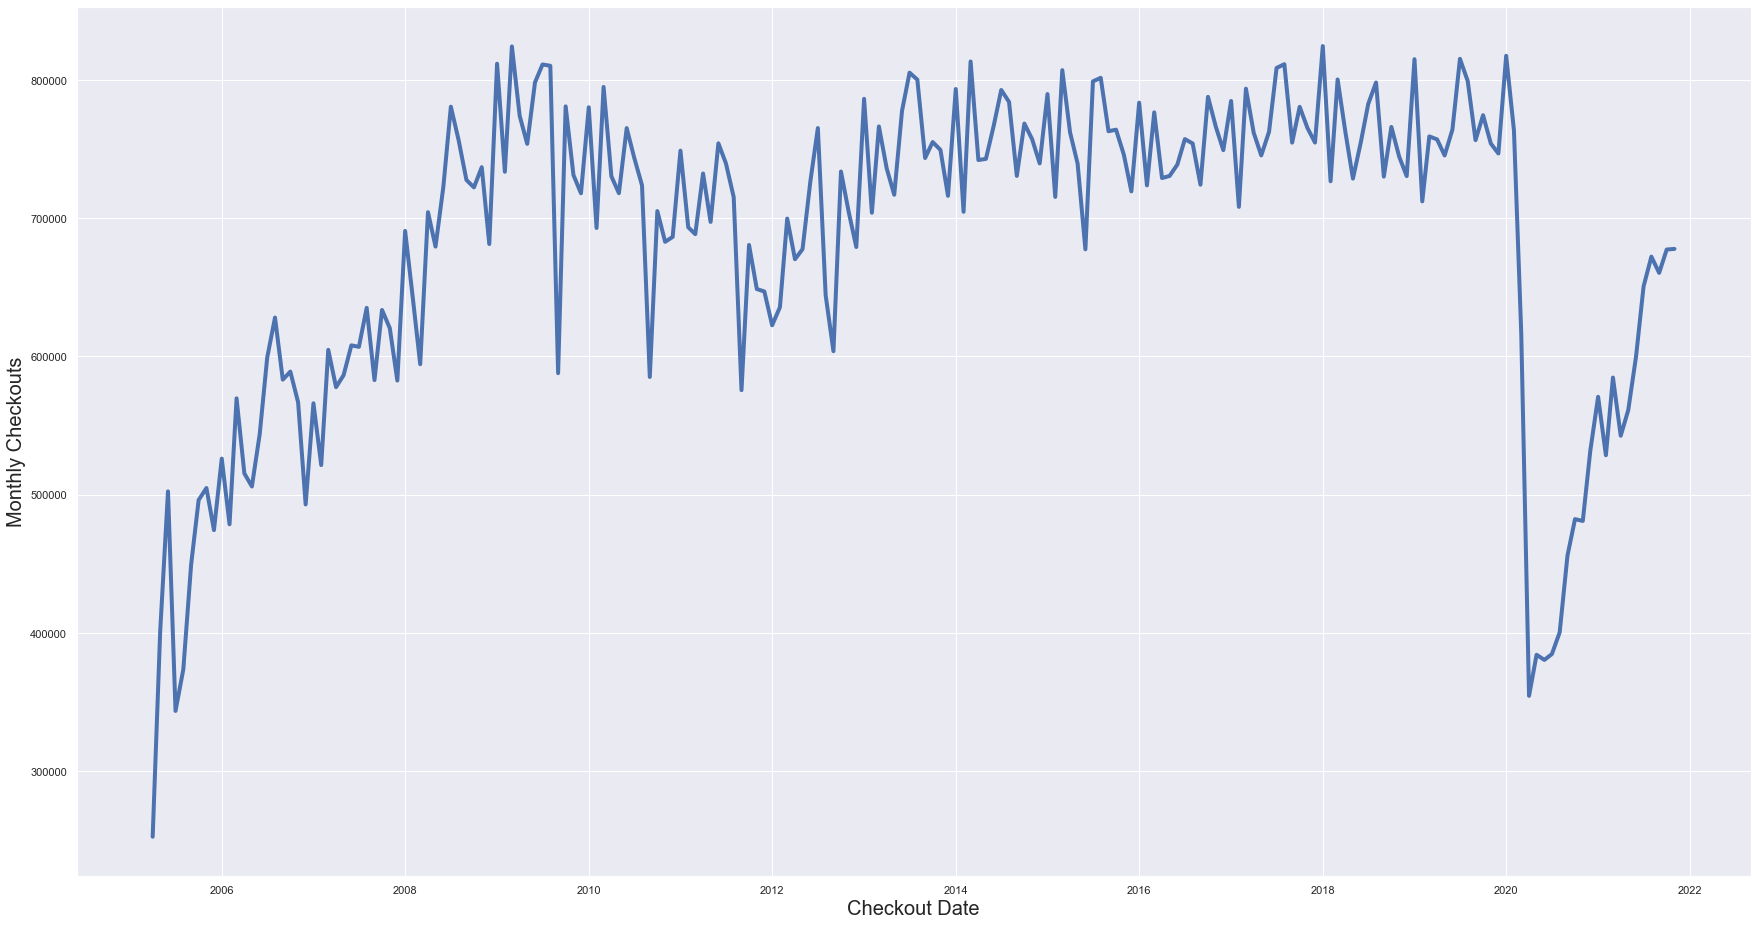

In [10]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = checkouts_by_month, linewidth=4)
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Monthly Checkouts", fontsize = 20)
sns.set(rc={'figure.figsize':(30,16)})
p

Overall we can see that dramatic events of 2020 decreased checkouts amount in 2020 and 2021, but Harry Potter was more popular than ever on the other hand. That's why I wonder: which titles were most popular in the first half of 2020?

In [11]:
covid_data = data[(data['CheckoutYear'] == 2020) & (data['CheckoutMonth'].isin(range(1, 7)))]

In [12]:
covid_data_top_n = covid_data.groupby(data['Title']).sum('Checkouts').nlargest(10, columns=['Checkouts'])

In [13]:
covid_data_top_n

,CheckoutYear,CheckoutMonth,Checkouts
Title,,,
So You Want to Talk about Race (Unabridged),12120,21,6751
"Harry Potter and the Sorcerer's Stone: Harry Potter Series, Book 1 (unabridged) (Unabridged)",12120,21,4128
Becoming (Unabridged),12120,21,3577
Becoming,12120,21,3526
FlexTech--Laptops.,6060,6,3451
Educated: A Memoir,12120,21,3006
Where the Crawdads Sing,12120,21,2889
Headphones / Seattle Public Library.,6060,6,2814
White Fragility: Why It's So Hard for White People to Talk About Racism,12120,21,2499


Exporing this shortlist, we can see that two of the titles can be related to a BLM movement. Let's grab some keywords and select titles which could be related to those events and check their popularity over time.

In [14]:
keywords = ['racism', 'race', 'people of color', 'white people', 'police brutality', 'martin luther king', 'skin color']
data['Title_lower'] = data['Title'].str.lower()

In [15]:
blm = data[data['Title_lower'].str.contains('|'.join(keywords))]

In [16]:
blm_checkouts_by_date = blm.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts').reset_index()
blm_checkouts_by_date['Date'] = pd.to_datetime(
    blm_checkouts_by_date['CheckoutYear']*100 + blm_checkouts_by_date['CheckoutMonth'], format="%Y%m"
)

<AxesSubplot:xlabel='Checkout Date', ylabel='Racism and police brutality related checkouts'>

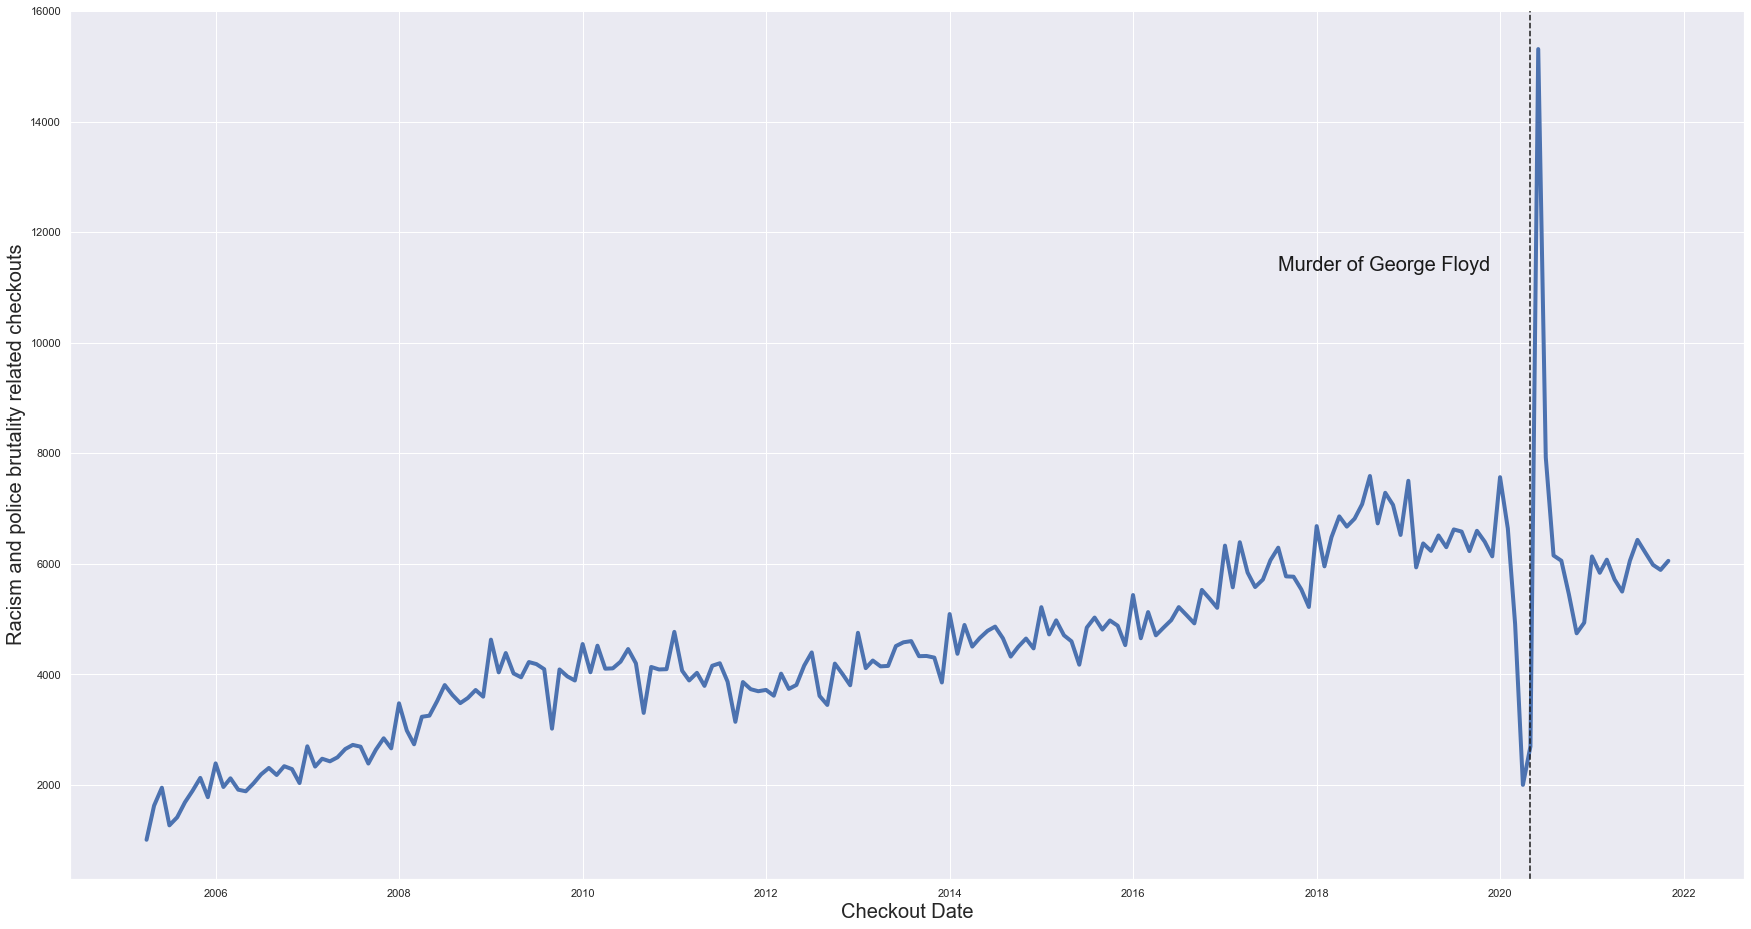

In [17]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = blm_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Racism and police brutality related checkouts", fontsize = 20)
p.axvline(datetime(2020, 5, 1), color="k", linestyle = "--")
p.text(datetime(2017, 8, 1), .7, 'Murder of George Floyd', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
p

We see a big dip before interest increase, since the murder of George Floyd happened in the May 2020, when the Covid lockdowns were very strict.